In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("insurance.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(1338, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: xlabel='age', ylabel='charges'>

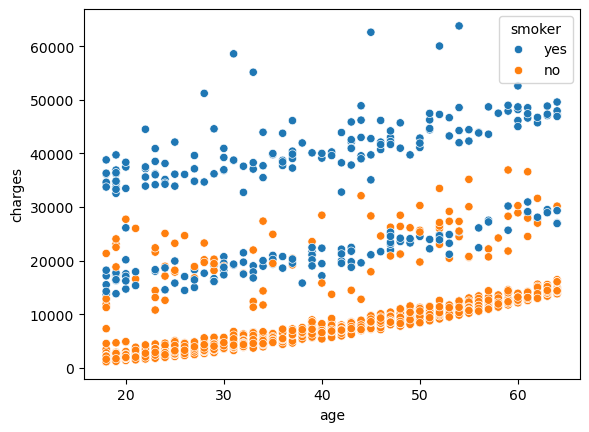

In [35]:
sns.scatterplot(data=df, x="age", y ="charges", hue="smoker")

<Axes: xlabel='charges', ylabel='Count'>

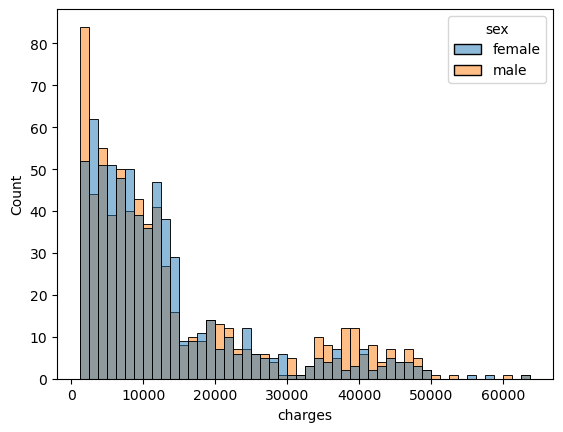

In [21]:
sns.histplot(data=df, x= "charges",bins= 50, hue="sex")

<Axes: xlabel='charges', ylabel='bmi'>

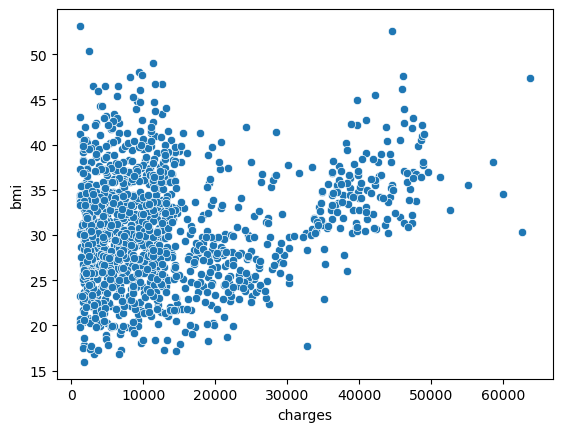

In [33]:
sns.scatterplot(data=df, x="charges", y ="bmi")

<Axes: xlabel='sex', ylabel='count'>

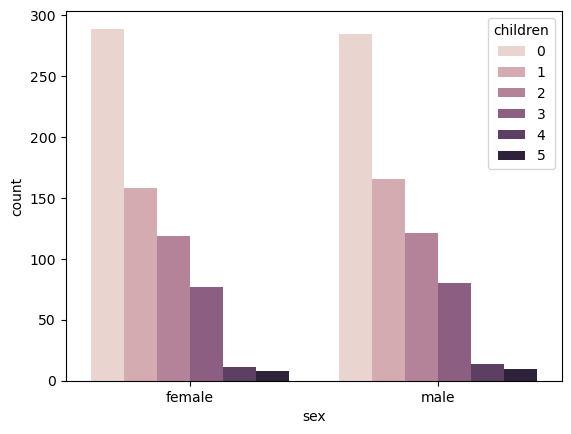

In [28]:
sns.countplot(data=df, x="sex", hue="children")

<Axes: xlabel='sex', ylabel='count'>

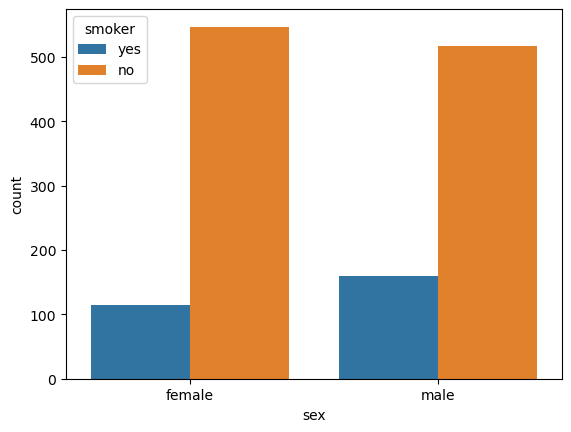

In [29]:
sns.countplot(data=df, x="sex", hue="smoker")

<Axes: xlabel='charges', ylabel='Count'>

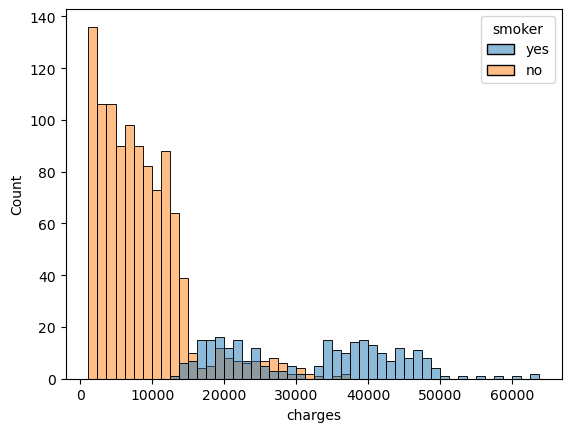

In [30]:
sns.histplot(data=df, x= "charges",bins= 50, hue="smoker")

<Axes: xlabel='age', ylabel='Count'>

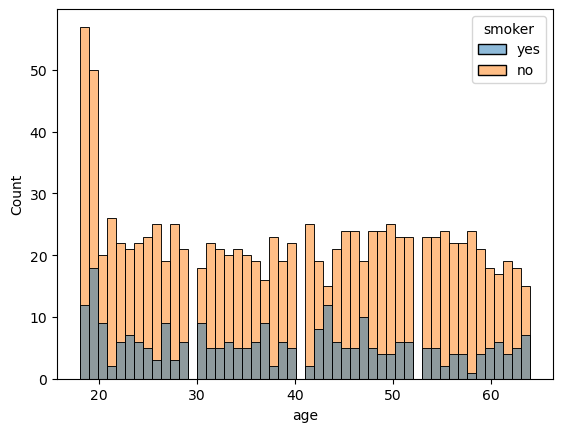

In [31]:
sns.histplot(data=df, x= "age",bins= 50, hue="smoker")

<Axes: xlabel='region', ylabel='Count'>

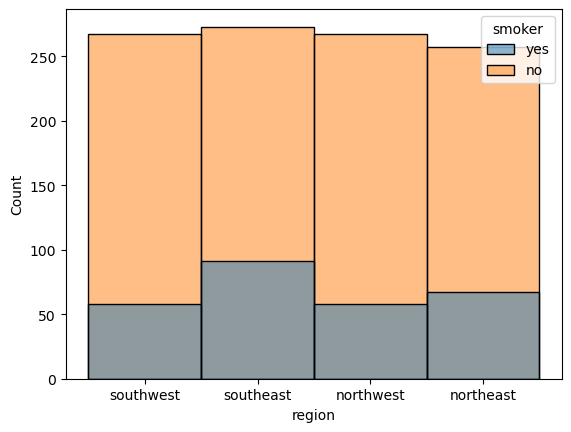

In [38]:
sns.histplot(data=df, x= "region",bins= 50, hue="smoker")

In [40]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [43]:
df["sex"] = df['sex'].map({"male": 0, "female": 1})

In [44]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [45]:
df["smoker"] = df['smoker'].map({"no": 0, "yes": 1})

In [46]:
df = df.join(pd.get_dummies(df["region"], drop_first=True, dtype=int))

In [48]:
df.drop("region", axis=1, inplace = True)

In [49]:
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


<Axes: >

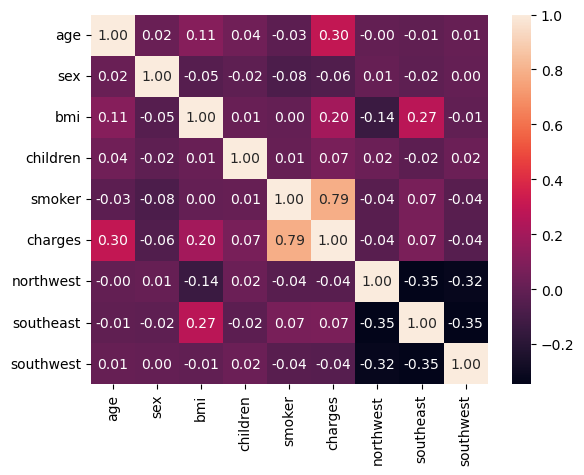

In [51]:
sns.heatmap(df.corr(), annot= True, fmt=".2f")

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=X["smoker"])

**LASSO**

In [137]:
from sklearn.linear_model import Lasso

In [138]:
lasso = Lasso()

In [139]:
lasso.fit(X_train, y_train)

Lasso()

In [140]:
predictions = lasso.predict(X_test)

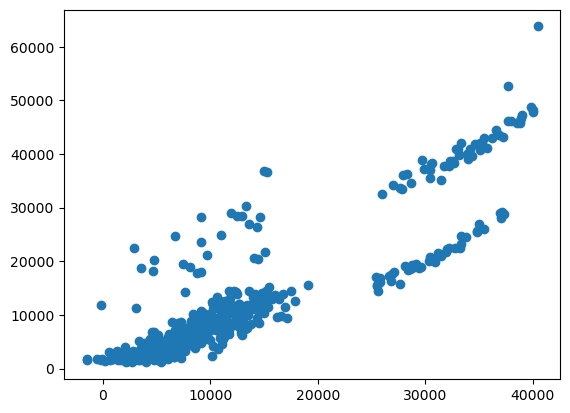

In [160]:
plt.scatter(y=y_test, x=predictions)

In [142]:
from sklearn.metrics import mean_squared_error, r2_score

In [143]:
df["charges"].mean()

13270.422265141257

In [144]:
print(np.sqrt(mean_squared_error(y_test, predictions)))

5787.869561973919


In [145]:
print(r2_score(y_test, predictions))

0.7731845716640656


In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
linear = LinearRegression()

In [148]:
linear.fit(X_train, y_train)

LinearRegression()

In [149]:
linear_predictions = linear.predict(X_test)

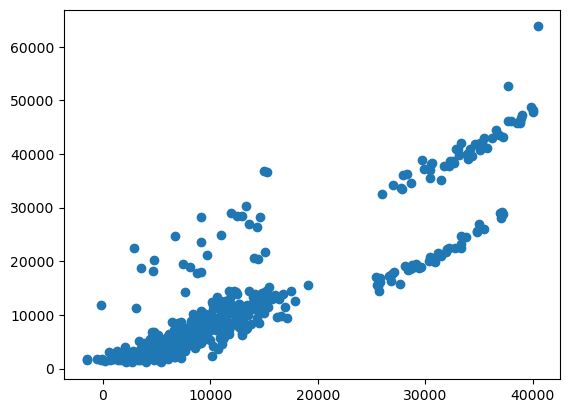

In [150]:
plt.scatter(x=linear_predictions, y=y_test)

In [151]:
print(np.sqrt(mean_squared_error(y_test, linear_predictions)))

5788.058345223463


In [152]:
print(r2_score(y_test, linear_predictions))

0.7731697753209679


**SVM**

In [153]:
from sklearn.svm import SVR

In [154]:
svm = SVR(kernel="rbf")

In [155]:
svm.fit(X_train, y_train)

SVR()

In [156]:
svm_predictions = svm.predict(X_test)

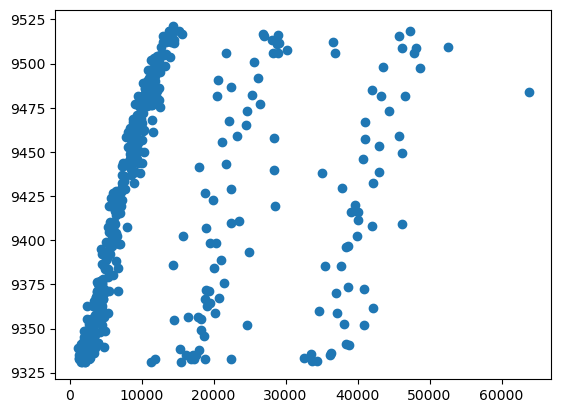

In [157]:
plt.scatter(x=y_test, y=svm_predictions)

In [158]:
print(np.sqrt(mean_squared_error(y_test, svm_predictions)))

12699.717712175068


In [159]:
print(r2_score(y_test, svm_predictions))

-0.09200155710391877
